# Exercise 9-1: Analyze time-series data

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stockData = pd.read_pickle('stocks.pkl')
stockData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


In [3]:
# display the first five rows
stockData.head()

,Date,Open,High,Low,Close
0,2020-01-02,74.059998,75.150002,73.797501,75.087502
1,2020-01-03,74.287498,75.144997,74.125000,74.357498
2,2020-01-06,73.447502,74.989998,73.187500,74.949997
3,2020-01-07,74.959999,75.224998,74.370003,74.597504
4,2020-01-08,74.290001,76.110001,74.290001,75.797501


## Generate date ranges

In [4]:
# generate a daterange for every other day in the year 2020
stockData['Date'] = stockData['Date'].apply(pd.to_datetime)
daterange = pd.date_range(start="2020-01-01", end="2020-12-31", freq="2D")
print(daterange)

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-05', '2020-01-07',
               '2020-01-09', '2020-01-11', '2020-01-13', '2020-01-15',
               '2020-01-17', '2020-01-19',
               ...
               '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-18',
               '2020-12-20', '2020-12-22', '2020-12-24', '2020-12-26',
               '2020-12-28', '2020-12-30'],
              dtype='datetime64[ns]', length=183, freq='2D')


In [6]:
# generate a daterange for every 3 hours in 2020
daterange_3hr = pd.date_range(start="2020-01-01", end="2020-12-31", freq="3H")
print(daterange_3hr)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:00:00',
               '2020-01-01 06:00:00', '2020-01-01 09:00:00',
               '2020-01-01 12:00:00', '2020-01-01 15:00:00',
               '2020-01-01 18:00:00', '2020-01-01 21:00:00',
               '2020-01-02 00:00:00', '2020-01-02 03:00:00',
               ...
               '2020-12-29 21:00:00', '2020-12-30 00:00:00',
               '2020-12-30 03:00:00', '2020-12-30 06:00:00',
               '2020-12-30 09:00:00', '2020-12-30 12:00:00',
               '2020-12-30 15:00:00', '2020-12-30 18:00:00',
               '2020-12-30 21:00:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=2921, freq='3h')


C:\Users\s225146371\AppData\Local\Temp\ipykernel_22816\818135676.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daterange_3hr = pd.date_range(start="2020-01-01", end="2020-12-31", freq="3H")


In [7]:
# generate a date range for every other Friday in 2020
daterange_friday = pd.date_range(start="2020-01-01", end="2020-12-31", freq="W-FRI")
print(daterange_friday)

DatetimeIndex(['2020-01-03', '2020-01-10', '2020-01-17', '2020-01-24',
               '2020-01-31', '2020-02-07', '2020-02-14', '2020-02-21',
               '2020-02-28', '2020-03-06', '2020-03-13', '2020-03-20',
               '2020-03-27', '2020-04-03', '2020-04-10', '2020-04-17',
               '2020-04-24', '2020-05-01', '2020-05-08', '2020-05-15',
               '2020-05-22', '2020-05-29', '2020-06-05', '2020-06-12',
               '2020-06-19', '2020-06-26', '2020-07-03', '2020-07-10',
               '2020-07-17', '2020-07-24', '2020-07-31', '2020-08-07',
               '2020-08-14', '2020-08-21', '2020-08-28', '2020-09-04',
               '2020-09-11', '2020-09-18', '2020-09-25', '2020-10-02',
               '2020-10-09', '2020-10-16', '2020-10-23', '2020-10-30',
               '2020-11-06', '2020-11-13', '2020-11-20', '2020-11-27',
               '2020-12-04', '2020-12-11', '2020-12-18', '2020-12-25'],
              dtype='datetime64[ns]', freq='W-FRI')


## Reindex the data

In [8]:
# set an index on the date column for the stock data
stockData.set_index('Date', inplace=True)

In [9]:
# reindex the data so the data contains only Fridays 
# and assign the result to a variable called stockDataFridays
stockDataFridays = stockData.reindex(daterange_friday)
stockDataFridays.head()

,Open,High,Low,Close
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-10,77.650002,78.167503,77.062500,77.582497
2020-01-17,79.067497,79.684998,78.750000,79.682503
2020-01-24,80.062500,80.832497,79.379997,79.577499
2020-01-31,80.232498,80.669998,77.072502,77.377502


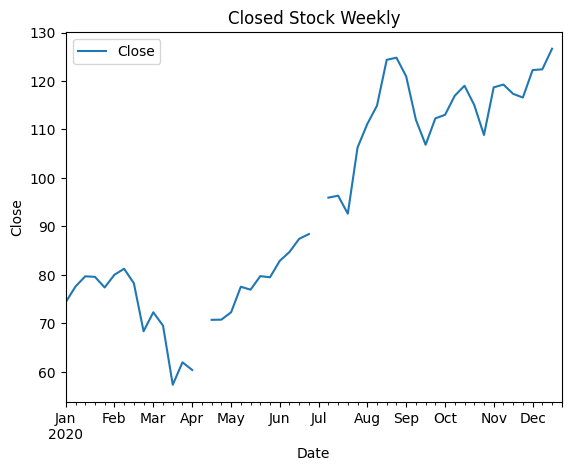

In [11]:
# use Pandas to plot the Close column of the reindexed data
stockDataFridays.plot(y='Close', kind='line')
plt.title('Closed Stock Weekly')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## Resample the data

C:\Users\s225146371\AppData\Local\Temp\ipykernel_22816\2039542036.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stock = stockData.resample('M').mean()


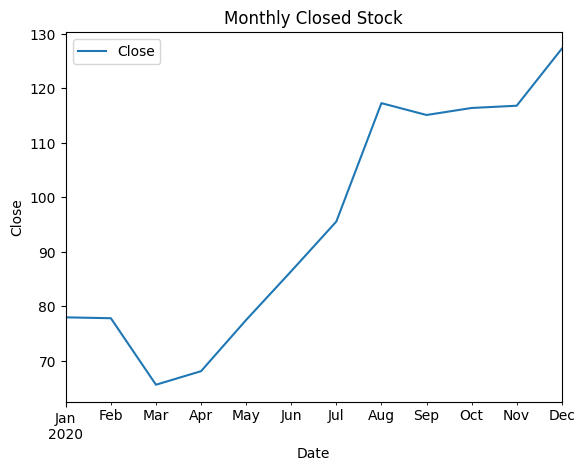

In [15]:
# downsample the data to a monthly frequency
monthly_stock = stockData.resample('M').mean()
monthly_stock.plot(y='Close', kind='line')
plt.title('Monthly Closed Stock')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [ ]:
# use Pandas to plot the Close column of the resampled data

## Compute a rolling window

In [17]:
# compute a 2 week rolling average for the Close column
# set the min_periods to 1 and assign the data to a variable called stocksRolling
stocksRolling = stockData['Close'].rolling(window=14, min_periods=1).mean()

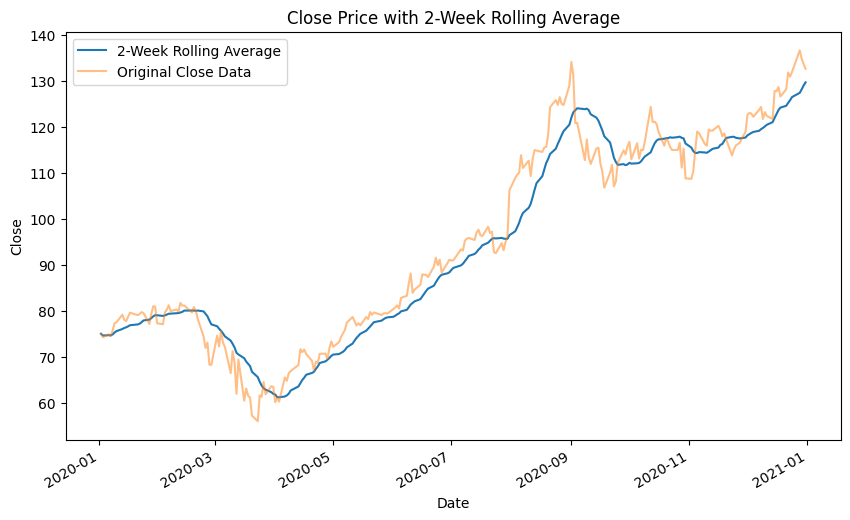

In [18]:
# use Pandas to plot the Close column of the rolling data
# Plot the rolling data
plt.figure(figsize=(10, 6))  # Set the figure size
stocksRolling.plot(label='2-Week Rolling Average')

# Optionally, plot the original 'Close' column for comparison
stockData['Close'].plot(label='Original Close Data', alpha=0.5)

# Add title and labels
plt.title('Close Price with 2-Week Rolling Average')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# Display the plot
plt.show()